In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.shape

(920, 16)

In [ ]:
df = df.drop('id',axis=1)
df = df.drop('dataset',axis=1)

In [ ]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
cat = list(df.select_dtypes(include='O').keys())
print(cat)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())

Male      726
Female    194
Name: sex, dtype: int64
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64
False    692
True     138
Name: fbs, dtype: int64
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64
False    528
True     337
Name: exang, dtype: int64
flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64
normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64


In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat:
  df[i] = label_encoder.fit_transform(df[i])

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [ ]:
null_columns = df.columns[df.isnull().any()].tolist()
for i in null_columns:
  df[i] = df[i].fillna(df[i].mean())

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
import plotly.graph_objects as go

labels = df['num'].unique()
values = df['num'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,
                             textinfo='percent+text',
                             textposition='inside',
                             insidetextorientation='horizontal',
                             texttemplate='%{percent:.0%} (%{value})'
                            )])

fig.update_layout(title_text="<b>Dependent Class Distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

In [ ]:
x = df.drop(columns=['num'])
y = df[['num']]

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1.007386,0.516931,2.319860,0.698041,0.311021,1.007489,-1.557856,0.495698,-0.799450,1.349421,-1.867587,-1.249371,-2.341576
1,1.432034,0.516931,-0.818774,1.511761,0.797713,-0.532195,-1.557856,-1.175955,0.845951,0.589832,-0.843642,4.292099,-1.284535
2,1.432034,0.516931,-0.818774,-0.658158,0.274289,-0.532195,-1.557856,-0.340128,0.845951,1.634267,-0.843642,2.444942,-0.227494
3,-1.752828,0.516931,1.273649,-0.115679,0.467130,-0.532195,0.008513,1.968345,-0.799450,2.488805,-1.867587,-1.249371,-1.284535
4,-1.328180,-1.934494,0.227437,-0.115679,0.044717,-0.532195,-1.557856,1.371326,-0.799450,0.494884,0.180303,-1.249371,-1.284535


In [ ]:
print(x.shape)
print(y.shape)

(920, 13)
(920, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)
print(x.shape)
print(y.shape)

(2055, 13)
(2055, 1)


In [ ]:
import plotly.graph_objects as go

labels = y['num'].unique()
values = y['num'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,
                             textinfo='percent+text',
                             textposition='inside',
                             insidetextorientation='horizontal',
                             texttemplate='%{percent:.0%} (%{value})'
                            )])

fig.update_layout(title_text="<b>Dependent Class Distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y,5)
y

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(13,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1792      
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 5)                

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=150,
    verbose=1,
    validation_split=0.1,
)

Epoch 1/150
47/47 [==============================] - 1s 6ms/step - loss: 1.7255 - accuracy: 0.2759 - val_loss: 1.5737 - val_accuracy: 0.4667
Epoch 2/150
47/47 [==============================] - 0s 2ms/step - loss: 1.5502 - accuracy: 0.3665 - val_loss: 1.3663 - val_accuracy: 0.5333
Epoch 3/150
47/47 [==============================] - 0s 2ms/step - loss: 1.4651 - accuracy: 0.4307 - val_loss: 1.2766 - val_accuracy: 0.5515
Epoch 4/150
47/47 [==============================] - 0s 2ms/step - loss: 1.4247 - accuracy: 0.4462 - val_loss: 1.2375 - val_accuracy: 0.5758
Epoch 5/150
47/47 [==============================] - 0s 2ms/step - loss: 1.3809 - accuracy: 0.4936 - val_loss: 1.1983 - val_accuracy: 0.6061
Epoch 6/150
47/47 [==============================] - 0s 2ms/step - loss: 1.3586 - accuracy: 0.4814 - val_loss: 1.1763 - val_accuracy: 0.6242
Epoch 7/150
47/47 [==============================] - 0s 2ms/step - loss: 1.3291 - accuracy: 0.4963 - val_loss: 1.1600 - val_accuracy: 0.6242
Epoch 8/150
4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob,axis=1)
y_test2= np.argmax(y_test,axis=1)

report =classification_report(y_test2,y_pred)
print(report)



13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        85
           1       0.83      0.54      0.66        81
           2       0.84      0.92      0.87        72
           3       0.88      0.92      0.90        84
           4       0.98      1.00      0.99        89

    accuracy                           0.85       411
   macro avg       0.85      0.85      0.84       411
weighted avg       0.85      0.85      0.84       411



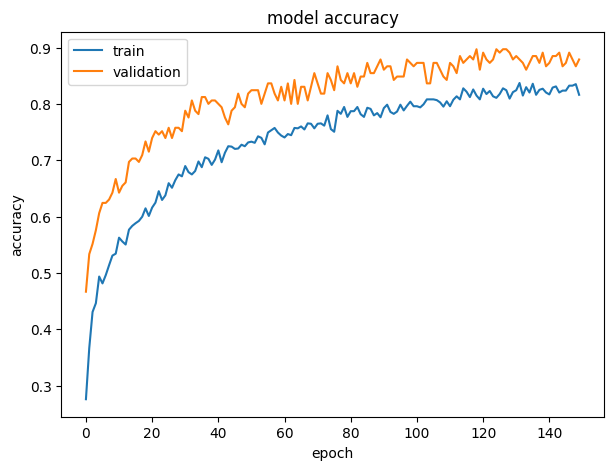

In [ ]:
# summarize history for accuracy (accuracy curve)
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

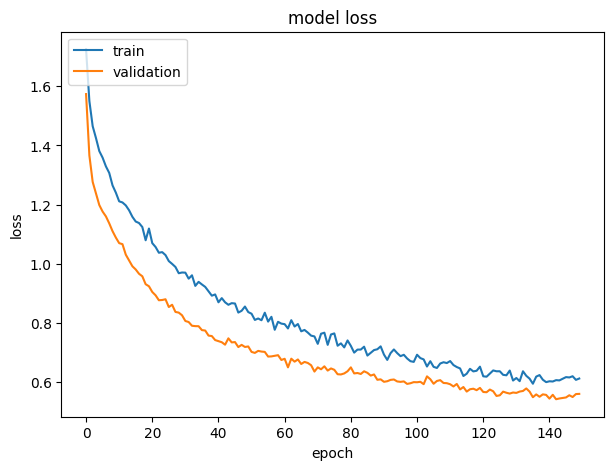

In [ ]:
# summarize history for loss (loss curve)
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

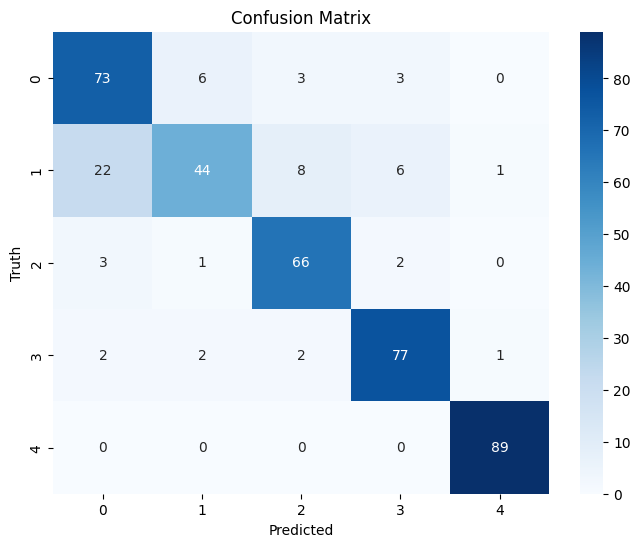

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Assuming y_test and y_pred are your true labels and predicted labels for multiclass classification

# Create confusion matrix
y_true_indices = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_indices, y_pred)

# Set a custom color palette using blue shades
cmap = "Blues"

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
